In [49]:
from skimage import io
from skimage import morphology
from skimage.color import rgb2gray
from skimage.filters import *

import matplotlib.pyplot as plt

from skimage import measure

from skimage.morphology import skeletonize


import numpy as np
import scipy.ndimage as ndimage   



from PIL import Image 


In [18]:
original = io.imread('mito.png')
grayscale = rgb2gray(original)



In [133]:
height,width,_ = original.shape
print(height,width)

199 277


In [19]:
gaussian = gaussian(grayscale, sigma=0.4)

In [20]:
thresh = threshold_otsu(gaussian)
binary = gaussian > thresh

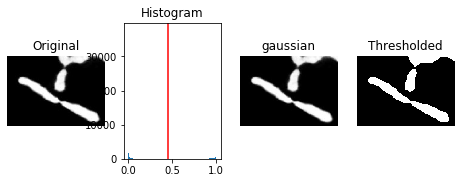

In [21]:
fig, axes = plt.subplots(ncols=4, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 4, 1)
ax[1] = plt.subplot(1, 4, 2)
ax[2] = plt.subplot(1, 4, 3)
ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])

ax[0].imshow(original)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(grayscale.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')


ax[2].imshow(gaussian, cmap=plt.cm.gray)
ax[2].set_title('gaussian')
ax[2].axis('off')


ax[3].imshow(binary, cmap=plt.cm.gray)
ax[3].set_title('Thresholded')
ax[3].axis('off')

plt.show()

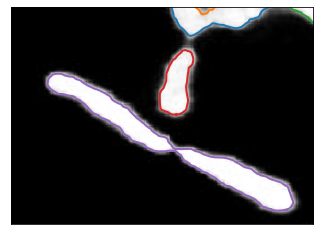

In [22]:
#找出輪廓
# Find contours at a constant value of 0.8
contours = measure.find_contours(gaussian, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(original, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# Smoothing Contour

In [169]:
contours[4]

array([[185.08810584, 252.        ],
       [185.26584072, 251.        ],
       [185.47314722, 250.        ],
       ...,
       [184.86712717, 253.        ],
       [185.        , 252.46105712],
       [185.08810584, 252.        ]])

In [170]:
contours[4].shape

(703, 2)

In [219]:
x = contours[4][:,1]
y = contours[4][:,0]

# append the starting x,y coordinates
#x = np.r_[x, x[0]]
#y = np.r_[y, y[0]]

print(x.shape)
print(y.shape)

(703,)
(703,)


(0, 277)

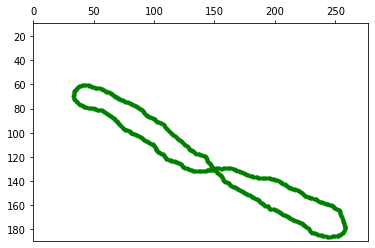

In [220]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'g.')
plt.axis('equal')

ax=plt.gca()                            # get the axis
ax.xaxis.tick_top()                     # and move the X-Axis      
ax.yaxis.tick_left()                    # remove right y-Ticks

ax.set_ylim(height, 0)
ax.set_xlim(0, width)


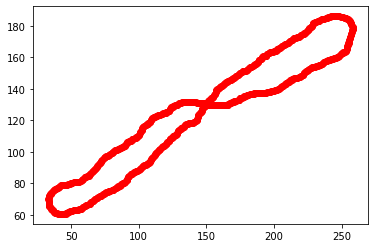

In [223]:
plt.plot(x, y, 'or')


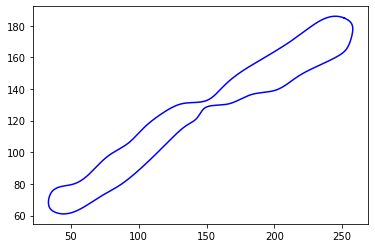

In [234]:
from scipy import interpolate

# fit splines to x=f(u) and y=g(u), treating both as periodic. also note that s=0
# is needed in order to force the spline fit to pass through all the input points.
tck, u = interpolate.splprep([x, y], s=200, per=True)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck)


# plot the result
fig, ax = plt.subplots(1, 1)
#ax.plot(x, y, 'or')
ax.plot(xi, yi, '-b')

In [232]:
xi.shape

(1000,)

(6,) (6,)


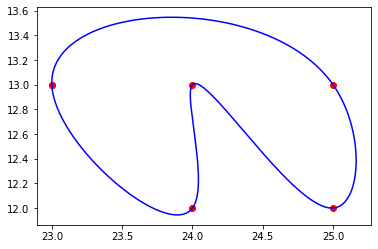

In [196]:
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt

x = np.array([23, 24, 24, 25, 25])
y = np.array([13, 12, 13, 12, 13])

# append the starting x,y coordinates
x = np.r_[x, x[0]]
y = np.r_[y, y[0]]

print(x.shape,y.shape)

# fit splines to x=f(u) and y=g(u), treating both as periodic. also note that s=0
# is needed in order to force the spline fit to pass through all the input points.
tck, u = interpolate.splprep([x, y], s=0, per=True)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'or')
ax.plot(xi, yi, '-b')

# 取出單一粒線體的輪廓

In [68]:
#觀察哪個輪廓最大，找出目標
for n, contour in enumerate(contours):
    print(n ,len(contour))

0 153
1 31
2 35
3 183
4 703


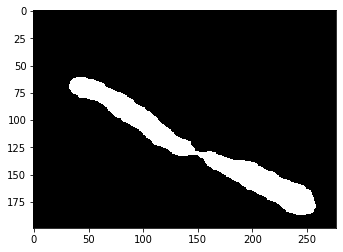

In [69]:
indice = 4
#只取出 contous[indice]為mask

# Create an empty image to store the masked array
mask = np.zeros_like(binary, dtype='bool')

# Create a contour image by using the contour coordinates rounded to their nearest integer value
mask[np.round(contours[indice][:, 0]).astype('int'), np.round(contours[indice][:, 1]).astype('int')] = 1

# Fill in the hole created by the contour boundary
mask = ndimage.binary_fill_holes(mask)

# Invert the mask since you want pixels outside of the region
#mask = ~mask

plt.imshow(mask, cmap=plt.cm.gray)

plt.show()

# 找出Backbone

In [70]:
skeleton = skeletonize(mask)

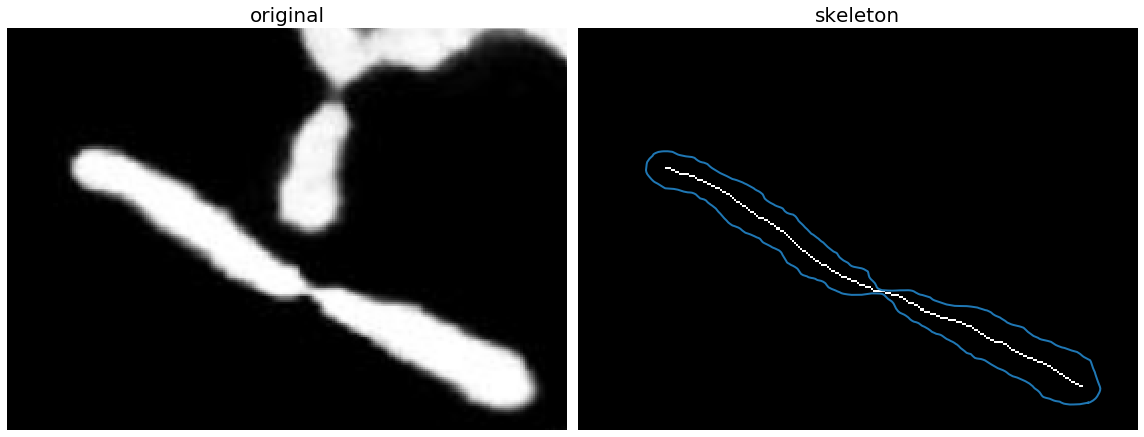

In [71]:
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(original, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)


"""
for n, contour in enumerate(contours):
    ax[1].plot(contour[:, 1], contour[:, 0], linewidth=2)
"""    

ax[1].plot(contours[indice][:,1], contours[indice][:,0], linewidth=2)
ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)


fig.tight_layout()
plt.show()

In [83]:
skeleton

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [144]:
# 把skeleton的數值取出xy座標，變成像contours[4]
pseudo_ep = (skeleton == True )
cols, rows = np.where(pseudo_ep)
skeleton_coord = np.array(list(zip(rows,cols)))

In [146]:
print(len(skeleton_coord))
print(skeleton_coord[100])

207
[143 128]


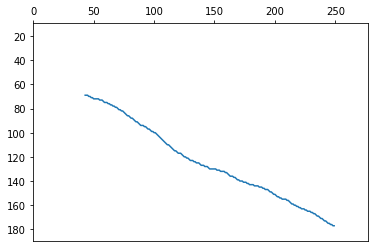

In [147]:
plt.plot(skeleton_coord[:,0],skeleton_coord[:,1])
plt.axis('equal')

ax=plt.gca()                            # get the axis
ax.xaxis.tick_top()                     # and move the X-Axis      
ax.yaxis.tick_left()                    # remove right y-Ticks

ax.set_ylim(height, 0)
ax.set_xlim(0, width)
#ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
#ax.yaxis.set_ticks(np.arange(0, 16, 1)) # set y-ticks


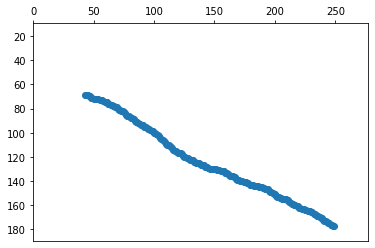

In [148]:
plt.scatter(skeleton_coord[:,0],skeleton_coord[:,1])
plt.axis('equal')

ax=plt.gca()                            # get the axis
ax.xaxis.tick_top()                     # and move the X-Axis      
ax.yaxis.tick_left()                    # remove right y-Ticks

ax.set_ylim(height, 0)
ax.set_xlim(0, width)
#ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
#ax.yaxis.set_ticks(np.arange(0, 16, 1)) # set y-ticks

plt.show()

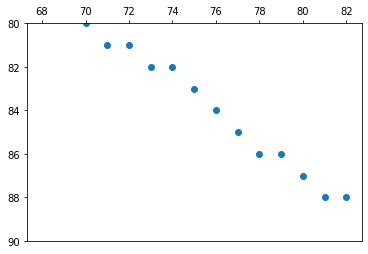

In [157]:
plt.scatter(skeleton_coord[:,0],skeleton_coord[:,1])
plt.axis('equal')

ax=plt.gca()                            # get the axis
ax.xaxis.tick_top()                     # and move the X-Axis      
ax.yaxis.tick_left()                    # remove right y-Ticks

ax.set_ylim(90, 80)
ax.set_xlim(70, 80)
#ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
#ax.yaxis.set_ticks(np.arange(0, 16, 1)) # set y-ticks

plt.show()

In [153]:
#內插出數值
from scipy import interpolate
skeleton_f = interpolate.interp1d(skeleton_coord[:,0], skeleton_coord[:,1])

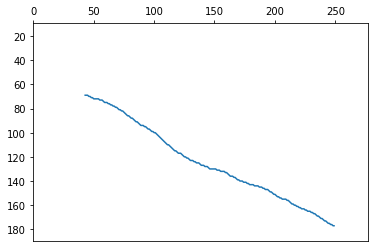

In [166]:
xnew = np.arange(skeleton_coord[0,0], skeleton_coord[-1,0], 0.1)
ynew = skeleton_f(xnew)   # use interpolation function returned by `interp1d`
plt.plot( xnew, ynew, '-')

plt.axis('equal')

ax=plt.gca()                            # get the axis
ax.xaxis.tick_top()                     # and move the X-Axis      
ax.yaxis.tick_left()                    # remove right y-Ticks

ax.set_ylim(height, 0)
ax.set_xlim(0, width)
#ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
#ax.yaxis.set_ticks(np.arange(0, 16, 1)) # set y-ticks

plt.show()


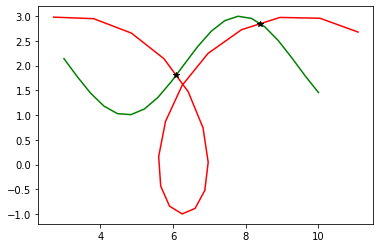

In [239]:
import numpy as np
import matplotlib.pyplot as plt
"""
Sukhbinder
5 April 2017
Based on:    
"""

def _rect_inter_inner(x1,x2):
    n1=x1.shape[0]-1
    n2=x2.shape[0]-1
    X1=np.c_[x1[:-1],x1[1:]]
    X2=np.c_[x2[:-1],x2[1:]]    
    S1=np.tile(X1.min(axis=1),(n2,1)).T
    S2=np.tile(X2.max(axis=1),(n1,1))
    S3=np.tile(X1.max(axis=1),(n2,1)).T
    S4=np.tile(X2.min(axis=1),(n1,1))
    return S1,S2,S3,S4

def _rectangle_intersection_(x1,y1,x2,y2):
    S1,S2,S3,S4=_rect_inter_inner(x1,x2)
    S5,S6,S7,S8=_rect_inter_inner(y1,y2)

    C1=np.less_equal(S1,S2)
    C2=np.greater_equal(S3,S4)
    C3=np.less_equal(S5,S6)
    C4=np.greater_equal(S7,S8)

    ii,jj=np.nonzero(C1 & C2 & C3 & C4)
    return ii,jj

def intersection(x1,y1,x2,y2):
    """
INTERSECTIONS Intersections of curves.
   Computes the (x,y) locations where two curves intersect.  The curves
   can be broken with NaNs or have vertical segments.
usage:
x,y=intersection(x1,y1,x2,y2)
    Example:
    a, b = 1, 2
    phi = np.linspace(3, 10, 100)
    x1 = a*phi - b*np.sin(phi)
    y1 = a - b*np.cos(phi)
    x2=phi    
    y2=np.sin(phi)+2
    x,y=intersection(x1,y1,x2,y2)
    plt.plot(x1,y1,c='r')
    plt.plot(x2,y2,c='g')
    plt.plot(x,y,'*k')
    plt.show()
    """
    ii,jj=_rectangle_intersection_(x1,y1,x2,y2)
    n=len(ii)

    dxy1=np.diff(np.c_[x1,y1],axis=0)
    dxy2=np.diff(np.c_[x2,y2],axis=0)

    T=np.zeros((4,n))
    AA=np.zeros((4,4,n))
    AA[0:2,2,:]=-1
    AA[2:4,3,:]=-1
    AA[0::2,0,:]=dxy1[ii,:].T
    AA[1::2,1,:]=dxy2[jj,:].T

    BB=np.zeros((4,n))
    BB[0,:]=-x1[ii].ravel()
    BB[1,:]=-x2[jj].ravel()
    BB[2,:]=-y1[ii].ravel()
    BB[3,:]=-y2[jj].ravel()

    for i in range(n):
        try:
            T[:,i]=np.linalg.solve(AA[:,:,i],BB[:,i])
        except:
            T[:,i]=np.NaN


    in_range= (T[0,:] >=0) & (T[1,:] >=0) & (T[0,:] <=1) & (T[1,:] <=1)

    xy0=T[2:,in_range]
    xy0=xy0.T
    return xy0[:,0],xy0[:,1]


if __name__ == '__main__':

    # a piece of a prolate cycloid, and am going to find
    a, b = 1, 2
    phi = np.linspace(3, 10, 20)
    x1 = a*phi - b*np.sin(phi)
    y1 = a - b*np.cos(phi)

    x2=phi
    y2=np.sin(phi)+2
    x,y=intersection(x1,y1,x2,y2)
    plt.plot(x1,y1,c='r')
    plt.plot(x2,y2,c='g')
    plt.plot(x,y,'*k')
    plt.show()